# Convolutional Neural Network To Classify Handwritten Digits

Using the MNIST dataset.

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [32]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [7]:
x_train.max(), x_train.min()

(255, 0)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'Class 5')

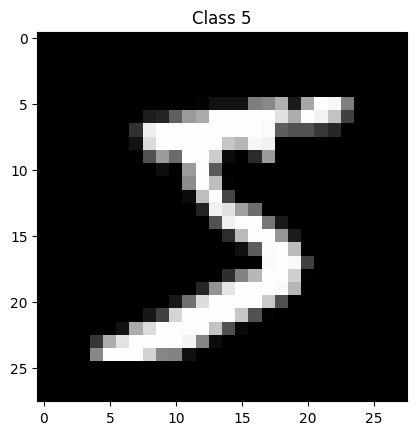

In [11]:
plt.imshow(x_train[0], cmap= 'gray')
plt.title('Class ' + str(y_train[0]))

In [ ]:
# pre-processing the data to send it to the neural network
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # if it was a colored image, the last parameter would be 3 (rgb)
x_train.shape

(60000, 28, 28, 1)

In [30]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
x_train = x_train.astype('float32')

# normalizing the data
x_train /= 255
x_train.max(), x_train.min()

(1.0, 0.0)

In [ ]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_test = x_test.astype('float32')

# normalizing the data
x_test /= 255
x_test.max(), x_test.min()

(1.0, 0.0)

In [ ]:
# class -> one-hot representation
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# creating a more complex neural network than necessary for study purposes
model = Sequential()

model.add(InputLayer(shape= (28, 28, 1)))

model.add(Conv2D(filters= 32, kernel_size= (3, 3), activation= 'relu')) #  convolution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2, 2))) # pooling layer

model.add(Conv2D(filters= 32, kernel_size= (3, 3), activation= 'relu')) #  convolution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2, 2))) # pooling layer

model.add(Flatten()) # flatten layer

model.add(Dense(units= 128, activation= 'relu')) # hidden layer
model.add(Dropout(rate= 0.2))

model.add(Dense(units= 128, activation= 'relu')) # hidden layer
model.add(Dropout(rate= 0.2))

model.add(Dense(units= 10, activation= 'softmax')) # output layer

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [25]:
model.compile(loss= 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics= ['accuracy', ])

In [26]:
model.fit(
    x_train,
    y_train,
    epochs= 5,
    batch_size= 128,
    validation_data = (x_test, y_test)
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.8630 - loss: 0.4416 - val_accuracy: 0.9673 - val_loss: 0.1201
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9802 - loss: 0.0659 - val_accuracy: 0.9848 - val_loss: 0.0502
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9857 - loss: 0.0478 - val_accuracy: 0.9893 - val_loss: 0.0348
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9899 - loss: 0.0349 - val_accuracy: 0.9902 - val_loss: 0.0340
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9906 - loss: 0.0292 - val_accuracy: 0.9909 - val_loss: 0.0333


In [28]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0413


[0.03333578631281853, 0.9908999800682068]